# EE697 Graduation Project
# Neural Networks Model on Current Mirror Dataset
# Spring 2024
# Zachary Chou 

In [1]:
# Import libraries numpy, pandas, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, confusion_matrix,classification_report

from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [2]:
# Read the csv file 
df = pd.read_csv('CurrentMirrorData.csv')

print(df) 

              W1         W2        L1        L2           Rd       Vth  \
0      11.535273  11.253561  1.635002  1.554789  11168.33570  1.099097   
1      11.657013   5.283991  2.276355  2.245678  16266.83301  0.938749   
2      10.034344   9.749873  1.423870  1.907299  11427.57885  1.078170   
3       5.314317   9.953446  1.908284  1.532619  25629.44160  0.828420   
4      12.633453   8.264820  2.005792  1.739820  21953.00888  1.111356   
...          ...        ...       ...       ...          ...       ...   
24995   6.120787  12.707425  1.266015  1.679263  12014.25296  0.945106   
24996   6.286746  11.723673  1.353313  1.674134  20768.56104  1.096102   
24997   5.738515  14.639721  1.266029  1.259818  11761.42361  0.842320   
24998   6.781429   6.016140  1.949894  1.743846  27415.10166  1.090841   
24999   6.874803  12.104731  2.615622  1.184040  21514.34417  1.152232   

            Vdd     I_ref        I0        MR  
0      2.824552  0.000010  0.000010  1.028689  
1      6.022707

In [3]:
# Show info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W1      25000 non-null  float64
 1   W2      25000 non-null  float64
 2   L1      25000 non-null  float64
 3   L2      25000 non-null  float64
 4   Rd      25000 non-null  float64
 5   Vth     25000 non-null  float64
 6   Vdd     25000 non-null  float64
 7   I_ref   25000 non-null  float64
 8   I0      25000 non-null  float64
 9   MR      25000 non-null  float64
dtypes: float64(10)
memory usage: 1.9 MB


In [4]:
# Finding the min and max for each column 

print("Max for W1 is: ", df.W1.max())
print("Min for W1 is: ", df.W1.min())

print("\nMax for W2 is: ", df.W2.max())
print("Min for W2 is: ", df.W2.min())

print("\nMax for L1 is: ", df.L1.max())
print("Min for L1 is: ", df.L1.min())

print("\nMax for L2 is: ", df.L2.max())
print("Min for L2 is: ", df.L2.min())


Max for W1 is:  14.99972772
Min for W1 is:  5.000493942

Max for W2 is:  14.99944475
Min for W2 is:  5.000110073

Max for L1 is:  2.999952451
Min for L1 is:  1.000133657

Max for L2 is:  2.999896449
Min for L2 is:  1.000299634


In [5]:
# Define equally spaced bins

bins_W1 = np.linspace(5.000493942, 14.99972772, num=11)  
df['W1_bins'] = pd.cut(df['W1'], bins_W1)
print(df['W1_bins'])

bins_W2 = np.linspace(5.000110073, 14.99944475, num=11)  
df['W2_bins'] = pd.cut(df['W2'], bins_W2)
print(df['W2_bins'])

bins_L1 = np.linspace(1.000133657, 2.999952451, num=11)  
df['L1_bins'] = pd.cut(df['L1'], bins_L1)
print(df['L1_bins'])

bins_L2 = np.linspace(1.000299634, 2.999896449, num=11)  
df['L2_bins'] = pd.cut(df['L2'], bins_L2)
print(df['L2_bins'])

0        (11.0, 12.0]
1        (11.0, 12.0]
2        (10.0, 11.0]
3          (5.0, 6.0]
4        (12.0, 13.0]
             ...     
24995      (6.0, 7.0]
24996      (6.0, 7.0]
24997      (5.0, 6.0]
24998      (6.0, 7.0]
24999      (6.0, 7.0]
Name: W1_bins, Length: 25000, dtype: category
Categories (10, interval[float64, right]): [(5.0, 6.0] < (6.0, 7.0] < (7.0, 8.0] < (8.0, 9.0] ... (11.0, 12.0] < (12.0, 13.0] < (13.0, 14.0] < (14.0, 15.0]]
0          (11.0, 12.0]
1            (5.0, 6.0]
2           (9.0, 10.0]
3           (9.0, 10.0]
4            (8.0, 9.0]
              ...      
24995      (12.0, 13.0]
24996      (11.0, 12.0]
24997    (14.0, 14.999]
24998        (6.0, 7.0]
24999      (12.0, 13.0]
Name: W2_bins, Length: 25000, dtype: category
Categories (10, interval[float64, right]): [(5.0, 6.0] < (6.0, 7.0] < (7.0, 8.0] < (8.0, 9.0] ... (11.0, 12.0] < (12.0, 13.0] < (13.0, 14.0] < (14.0, 14.999]]
0        (1.6, 1.8]
1        (2.2, 2.4]
2        (1.4, 1.6]
3        (1.8, 2.0]
4     

In [6]:
# Showing band range for each output feature
print("Band range for W1: \n",df.W1_bins.value_counts())

print("\nBand range for W2: \n",df.W2_bins.value_counts())

print("\nBand range for L1: \n",df.L1_bins.value_counts())

print("\nBand range for L2: \n",df.L2_bins.value_counts())

Band range for W1: 
 (11.0, 12.0]    2579
(8.0, 9.0]      2554
(5.0, 6.0]      2517
(10.0, 11.0]    2516
(14.0, 15.0]    2503
(7.0, 8.0]      2500
(6.0, 7.0]      2483
(12.0, 13.0]    2470
(9.0, 10.0]     2446
(13.0, 14.0]    2431
Name: W1_bins, dtype: int64

Band range for W2: 
 (12.0, 13.0]      2550
(8.0, 9.0]        2525
(10.0, 11.0]      2525
(5.0, 6.0]        2521
(9.0, 10.0]       2507
(6.0, 7.0]        2504
(14.0, 14.999]    2503
(7.0, 8.0]        2501
(13.0, 14.0]      2489
(11.0, 12.0]      2374
Name: W2_bins, dtype: int64

Band range for L1: 
 (1.6, 1.8]    2560
(2.4, 2.6]    2551
(2.8, 3.0]    2529
(1.2, 1.4]    2526
(1.4, 1.6]    2515
(2.0, 2.2]    2514
(2.6, 2.8]    2504
(2.2, 2.4]    2479
(1.0, 1.2]    2412
(1.8, 2.0]    2409
Name: L1_bins, dtype: int64

Band range for L2: 
 (2.4, 2.6]    2556
(2.6, 2.8]    2531
(1.4, 1.6]    2527
(1.8, 2.0]    2492
(2.8, 3.0]    2491
(2.0, 2.2]    2485
(1.0, 1.2]    2484
(1.2, 1.4]    2482
(1.6, 1.8]    2481
(2.2, 2.4]    2470
Name: L2_

In [7]:
# Converting the categorical bins to numerical

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['W1_bins'] = le.fit_transform(df.W1_bins)

le1 = LabelEncoder()
df['W2_bins'] = le1.fit_transform(df.W2_bins)

le2 = LabelEncoder()
df['L1_bins'] = le2.fit_transform(df.L1_bins)

le3 = LabelEncoder()
df['L2_bins'] = le3.fit_transform(df.L2_bins)

print("Bands for W1: \n",df['W1_bins'].unique())
print("\nBands for W2: \n",df['W2_bins'].unique())
print("\nBands for L1: \n",df['L1_bins'].unique())
print("\nBands for L2: \n",df['L2_bins'].unique())

Bands for W1: 
 [ 6  5  0  7  8  3  4  2  9  1 10]

Bands for W2: 
 [ 6  0  4  3  1  7  5  2  8  9 10]

Bands for L1: 
 [ 3  6  2  4  5  7  1  8  9  0 10]

Bands for L2: 
 [ 2  6  4  3  1  5  8  0  9  7 10]


In [8]:
# Showing how many times a band occurs 
print("How many times a certin W1 band occurs: \n", df.W1_bins.value_counts())

print("\nHow many times a certin W2 band occurs: \n", df.W2_bins.value_counts())

print("\nHow many times a certin L1 band occurs: \n", df.L1_bins.value_counts())

print("\nHow many times a certin L2 band occurs: \n", df.L2_bins.value_counts())

How many times a certin W1 band occurs: 
 6     2579
3     2554
0     2517
5     2516
9     2503
2     2500
1     2483
7     2470
4     2446
8     2431
10       1
Name: W1_bins, dtype: int64

How many times a certin W2 band occurs: 
 7     2550
3     2525
5     2525
0     2521
4     2507
1     2504
9     2503
2     2501
8     2489
6     2374
10       1
Name: W2_bins, dtype: int64

How many times a certin L1 band occurs: 
 3     2560
7     2551
9     2529
1     2526
2     2515
5     2514
8     2504
6     2479
0     2412
4     2409
10       1
Name: L1_bins, dtype: int64

How many times a certin L2 band occurs: 
 7     2556
8     2531
2     2527
4     2492
9     2491
5     2485
0     2484
1     2482
3     2481
6     2470
10       1
Name: L2_bins, dtype: int64


In [9]:
# Print df again with the new columns 
print(df)

              W1         W2        L1        L2           Rd       Vth  \
0      11.535273  11.253561  1.635002  1.554789  11168.33570  1.099097   
1      11.657013   5.283991  2.276355  2.245678  16266.83301  0.938749   
2      10.034344   9.749873  1.423870  1.907299  11427.57885  1.078170   
3       5.314317   9.953446  1.908284  1.532619  25629.44160  0.828420   
4      12.633453   8.264820  2.005792  1.739820  21953.00888  1.111356   
...          ...        ...       ...       ...          ...       ...   
24995   6.120787  12.707425  1.266015  1.679263  12014.25296  0.945106   
24996   6.286746  11.723673  1.353313  1.674134  20768.56104  1.096102   
24997   5.738515  14.639721  1.266029  1.259818  11761.42361  0.842320   
24998   6.781429   6.016140  1.949894  1.743846  27415.10166  1.090841   
24999   6.874803  12.104731  2.615622  1.184040  21514.34417  1.152232   

            Vdd     I_ref        I0        MR  W1_bins  W2_bins  L1_bins  \
0      2.824552  0.000010  0.000010

In [10]:
# Presenting table after data cleaning
df.drop(df.iloc[:,:4], axis = 1, inplace=True)
print(df)

                Rd       Vth       Vdd     I_ref        I0        MR  W1_bins  \
0      11168.33570  1.099097  2.824552  0.000010  0.000010  1.028689        6   
1      16266.83301  0.938749  6.022707  0.000009  0.000004  0.462216        6   
2      11427.57885  1.078170  5.078051  0.000007  0.000005  0.729013        5   
3      25629.44160  0.828420  6.083001  0.000013  0.000029  2.344460        0   
4      21953.00888  1.111356  5.155948  0.000013  0.000010  0.757935        7   
...            ...       ...       ...       ...       ...       ...      ...   
24995  12014.25296  0.945106  4.108082  0.000011  0.000017  1.571318        1   
24996  20768.56104  1.096102  3.300727  0.000007  0.000010  1.512108        1   
24997  11761.42361  0.842320  6.748932  0.000011  0.000028  2.580158        0   
24998  27415.10166  1.090841  4.954131  0.000006  0.000006  0.996730        1   
24999  21514.34417  1.152232  6.069562  0.000011  0.000042  3.909648        1   

       W2_bins  L1_bins  L2

In [11]:
# Define X and y dataframes
X = df.loc[:,['Vth','Vdd','Rd','I_ref','I0','MR'
             ]].values

y = df.loc[:,['W1_bins','W2_bins','L1_bins','L2_bins']].values 

print('X data frame is \n',X)

print('\ny data frame is \n',y)

X data frame is 
 [[1.09909676e+00 2.82455220e+00 1.11683357e+04 9.97033000e-06
  1.02564000e-05 1.02868891e+00]
 [9.38748538e-01 6.02270743e+00 1.62668330e+04 9.26728000e-06
  4.28349000e-06 4.62216052e-01]
 [1.07816992e+00 5.07805087e+00 1.14275788e+04 7.32795000e-06
  5.34217000e-06 7.29012740e-01]
 ...
 [8.42320006e-01 6.74893209e+00 1.17614236e+04 1.10173000e-05
  2.84264000e-05 2.58015803e+00]
 [1.09084128e+00 4.95413081e+00 2.74151017e+04 5.76206000e-06
  5.74322000e-06 9.96730200e-01]
 [1.15223167e+00 6.06956163e+00 2.15143442e+04 1.08444000e-05
  4.23979000e-05 3.90964802e+00]]

y data frame is 
 [[6 6 3 2]
 [6 0 6 6]
 [5 4 2 4]
 ...
 [0 9 1 1]
 [1 1 4 3]
 [1 7 8 0]]


In [12]:
# Summary statistics 
mean_vals = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)

mean_vals_y = np.mean(y, axis=0)
std_dev_y = np.std(y, axis=0)
min_vals_y = np.min(y, axis=0)
max_vals_y = np.max(y, axis=0)

print('Mean Values for X: \n', np.round(mean_vals, 4))
print('Standard Deviation for X: \n', np.round(std_dev,4))
print('Min Values for X: \n', np.round(min_vals, 4))
print('Max Values for X: \n', np.round(max_vals,4))

print('\nMean Values for y: \n', np.round(mean_vals_y, 4))
print('Standard Deviation for y: \n', np.round(std_dev_y, 4))
print('Min Value for y: \n', np.round(min_vals_y, 4))
print('Max Values for y: \n', np.round(max_vals_y, 4))

Mean Values for X: 
 [1.00090000e+00 4.99610000e+00 1.99721025e+04 0.00000000e+00
 0.00000000e+00 1.21410000e+00]
Standard Deviation for X: 
 [1.1510000e-01 1.4443000e+00 5.7698923e+03 0.0000000e+00 0.0000000e+00
 7.9740000e-01]
Min Values for X: 
 [8.0000000e-01 2.5002000e+00 1.0000654e+04 0.0000000e+00 0.0000000e+00
 1.3570000e-01]
Max Values for X: 
 [1.20000000e+00 7.49980000e+00 2.99998593e+04 0.00000000e+00
 1.00000000e-04 7.58850000e+00]

Mean Values for y: 
 [4.4903 4.4911 4.519  4.5104]
Standard Deviation for y: 
 [2.8687 2.876  2.87   2.8729]
Min Value for y: 
 [0 0 0 0]
Max Values for y: 
 [10 10 10 10]


In [13]:
# Convert the X and Y DataFrames to arrays

data = pd.DataFrame(X)

X = data.to_numpy()

display(X)  

Data = pd.DataFrame(y)

y = Data.to_numpy()

display(y)

array([[1.09909676e+00, 2.82455220e+00, 1.11683357e+04, 9.97033000e-06,
        1.02564000e-05, 1.02868891e+00],
       [9.38748538e-01, 6.02270743e+00, 1.62668330e+04, 9.26728000e-06,
        4.28349000e-06, 4.62216052e-01],
       [1.07816992e+00, 5.07805087e+00, 1.14275788e+04, 7.32795000e-06,
        5.34217000e-06, 7.29012740e-01],
       ...,
       [8.42320006e-01, 6.74893209e+00, 1.17614236e+04, 1.10173000e-05,
        2.84264000e-05, 2.58015803e+00],
       [1.09084128e+00, 4.95413081e+00, 2.74151017e+04, 5.76206000e-06,
        5.74322000e-06, 9.96730200e-01],
       [1.15223167e+00, 6.06956163e+00, 2.15143442e+04, 1.08444000e-05,
        4.23979000e-05, 3.90964802e+00]])

array([[6, 6, 3, 2],
       [6, 0, 6, 6],
       [5, 4, 2, 4],
       ...,
       [0, 9, 1, 1],
       [1, 1, 4, 3],
       [1, 7, 8, 0]])

In [14]:
# Normalize the data 

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

print('Normalized X data is \n',X)
print('Normalized y data is \n',y)

Normalized X data is 
 [[ 0.85342393 -1.50352303 -1.52581129 -0.0166911  -0.21101131 -0.232499  ]
 [-0.53951149  0.71078136 -0.64217308 -0.26037135 -0.87792673 -0.94292311]
 [ 0.67163369  0.05673019 -1.48088096 -0.93255176 -0.75971801 -0.60832844]
 ...
 [-1.37718037  1.21359699 -1.42302117  0.34619336  1.81779092  1.71322716]
 [ 0.78170903 -0.02906825  1.28997193 -1.4752962  -0.71493809 -0.27257902]
 [ 1.31500372  0.74322176  0.26729124  0.28626546  3.3778025   3.38056518]]
Normalized y data is 
 [[ 0.52626483  0.52466735 -0.5292791  -0.87384663]
 [ 0.52626483 -1.56159575  0.51601088  0.51849356]
 [ 0.1776712  -0.17075368 -0.87770909 -0.17767653]
 ...
 [-1.56529693  1.56779891 -1.22613909 -1.22193168]
 [-1.2167033  -1.21388523 -0.1808491  -0.52576158]
 [-1.2167033   0.87237787  1.21287087 -1.57001672]]


In [15]:
# Using the train_test_split function, split the data into a training data set, and a test data set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train=", X_train)
print("X_test=", X_test)
print("y_train", y_train)
print("y_test", y_test)

X_train= [[-0.73927691  1.66208878 -0.48636023 -1.14094422 -0.92239624 -0.79824175]
 [-0.8045204  -0.3970948   0.77760557  1.70741302 -0.05162137 -0.5421096 ]
 [-0.51541982  1.02836032 -1.1259631  -0.23323916 -0.04805952  0.0495949 ]
 ...
 [ 1.0903386  -0.63971804  0.74418688 -1.13126356 -0.3957462   0.07450087]
 [ 1.48967104 -0.35152886 -1.21293865  0.61155373  1.38403814  1.08950499]
 [ 1.02736933 -0.38033811  1.66325723 -0.63037507 -0.03937263  0.28118659]]
X_test= [[ 0.27911762 -0.90892615 -1.515125    0.92502279 -0.15640002 -0.46042118]
 [ 0.30405634 -0.44702292  0.78686116  0.86682791  0.44656849  0.09477848]
 [ 0.26059326 -0.66995209 -0.66904851 -0.05886939 -0.94964383 -1.05892991]
 ...
 [-0.84014384 -1.60528619  0.56063028  1.07198308  3.94611277  3.01968532]
 [-1.66219927  0.84475501  0.48012628 -0.3989854  -0.47871383 -0.4111129 ]
 [-0.92397982  1.59765826  0.96171838 -1.71665421 -1.21239549 -1.20373284]]
y_train [[ 0.52626483  0.17695684 -0.87770909  1.21466366]
 [ 0.1776712

In [16]:
# Build the neural network model

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
313/313 [==============================] - 1s 3ms/step - loss: 0.9844 - accuracy: 0.3864 - val_loss: 0.9244 - val_accuracy: 0.4216
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9222 - accuracy: 0.4062 - val_loss: 0.9182 - val_accuracy: 0.4042
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9201 - accuracy: 0.4035 - val_loss: 0.9173 - val_accuracy: 0.3988
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9196 - accuracy: 0.3983 - val_loss: 0.9169 - val_accuracy: 0.3952
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9193 - accuracy: 0.4035 - val_loss: 0.9169 - val_accuracy: 0.4030
Epoch 6/100
313/313 [==============================] - 1s 3ms/step - loss: 0.9192 - accuracy: 0.3989 - val_loss: 0.9167 - val_accuracy: 0.4076
Epoch 7/100
313/313 [==============================] - 1s 3ms/step - loss: 0.9191 - accuracy: 0.4005 - val_loss: 0.9168 - val_accuracy: 0.3782

In [18]:
# Evaluate the model's performance on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)

157/157 [==============================] - 0s 2ms/step - loss: 0.9169 - accuracy: 0.4056
Test Loss: 0.9169048070907593
Test Accuracy: 0.40560001134872437
157/157 [==============================] - 0s 1ms/step
(5000, 4) (5000, 4)


In [19]:
# Plot confusion matrix and the classification report 
predictions = model.predict(X_test)
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions,
axis=1)))

print(classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)))

157/157 [==============================] - 0s 1ms/step
[[765 210 118 369]
 [146 550 515 141]
 [ 96 416 421  85]
 [640 151  85 292]]
              precision    recall  f1-score   support

           0       0.46      0.52      0.49      1462
           1       0.41      0.41      0.41      1352
           2       0.37      0.41      0.39      1018
           3       0.33      0.25      0.28      1168

    accuracy                           0.41      5000
   macro avg       0.39      0.40      0.39      5000
weighted avg       0.40      0.41      0.40      5000



In [20]:
# Making predictions

y_pred = model.predict(X_test)

157/157 [==============================] - 0s 1ms/step


In [21]:
# Show model performance 

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2 ): ", r2)

Mean Absolute Error (MAE):  0.818294727369383
Mean Squared Error (MSE):  0.9169047910090772
Root Mean Squared Error (RMSE):  0.9575514560633686
R-squared (R2 ):  0.07901429482149158


In [39]:
# User input for MR 
user_MR = 0.9

# Create an array with the input features (Vth, Vdd, Rd, I_ref, IO, and user-defined MR)
user_input = [1,5,300,0.0000500,0.0000100,user_MR]

# Get the predicted encoded value for W1_bins
predicted_W1_encoded = model.predict([user_input])
predicted_W2_encoded = model.predict([user_input])
predicted_L1_encoded = model.predict([user_input])
predicted_L2_encoded = model.predict([user_input])

# Inverse transform to get the original bin label
predicted_W1_bin = le.inverse_transform([predicted_W1_encoded.argmax()])[0]
predicted_W2_bin = le1.inverse_transform([predicted_W2_encoded.argmax()])[0]
predicted_L1_bin = le2.inverse_transform([predicted_L1_encoded.argmax()])[0]
predicted_L2_bin = le3.inverse_transform([predicted_L2_encoded.argmax()])[0]

print("Predicted W1 bin:", predicted_W1_bin)
print("Predicted W2 bin:", predicted_W2_bin)
print("Predicted L1 bin:", predicted_L1_bin)
print("Predicted L2 bin:", predicted_L2_bin)

1/1 [==============================] - 0s 56ms/step
Predicted W1 bin: (5.0, 6.0]
Predicted W2 bin: (5.0, 6.0]
Predicted L1 bin: (1.0, 1.2]
Predicted L2 bin: (1.0, 1.2]


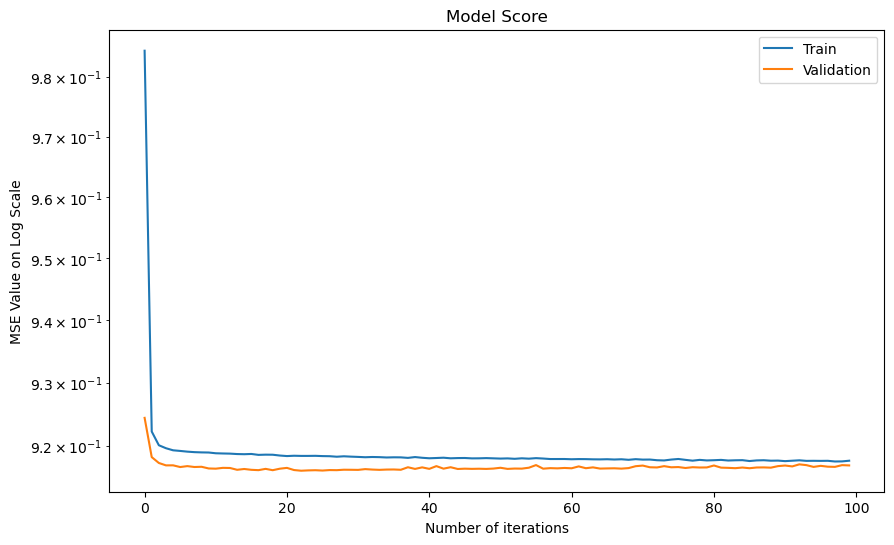

In [23]:
# Plot the training loss 
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Score')
plt.xlabel('Number of iterations')
plt.ylabel('MSE Value on Log Scale')
plt.yscale('log')
plt.legend()
plt.show()